<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 4: *Classification And Regression Tree (CART)***

###**Tenggat Waktu: 13 Maret 2023, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: F_Lab4_1806205773_Abdurrafi Arief.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 13 Maret 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.

## **Pertanyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [97]:
# Isi dengan data diri Anda
NAMA = "IQBAL PAHLEVI AMIN"
KELAS = "KASDD - B"
NPM = "2106752281"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = ['sudah saya cantumkan pada nomor terkait (karena disuruh pada soal)']

In [98]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, IQBAL PAHLEVI AMIN dari kelas KASDD - B dengan NPM 2106752281, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (IQBAL PAHLEVI AMIN)


# Dataset

Tugas ini menggunakan <b>Dataset Gender</b> (gender.csv), dimana model klasifikasi akan menentukan apakah seseorang merupakan perempuan atau laki-laki berdasarkan ciri-cirinya. <br>
(Sumber: https://www.kaggle.com/datasets/uciml/mushroom-classification?resource=download dengan perubahan.)  
Dataset terdiri dari:
 - 7 atribut 
    * long_hair – Apakah rambutnya panjang (1) atau tidak (0)
    * forehead_width_cm – Lebar dahi dari kiri ke kanan dalam satuan cm
    * forehead_height_cm – Lebar dahi dari ujung rambut ke alis dalam satuan cm
    * nose_wide - Apakah hidungnya lebar (1) atau tidak (0)
    * nose_long - Apakah hidungnya panjang (1) atau tidak (0)
    * lips_thin - Apakah bibirnya tipis (1) atau tidak (0) 
    * distance_nose_to_lip_long - Apakah jarak antara hidup ke bibir panjang (1) atau tidak (0)
 - 1 target
    * gender - Jenis kelamin (Male atau Female)
 - 5001 baris data

# Read Dataset

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns

# Import data
df = pd.read_csv('gender.csv')
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


# Split Data Train and Test

In [101]:
# Memisahkan features and label
X = df.drop('gender', axis=1)
y = df['gender']

In [102]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi training set dan test set
# dengan jumlah test set adalah sebanyak 20% dari data keseluruhan 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CART (Classification and Regression Tree)

## Decision Tree

Decision Tree adalah sebuah model yang menggunakan struktur berupa Binary  Tree (Setiap node memiliki maksimal 2 children). Decision Tree digunakan pada data science yang bersifat Supervised Learning (Model akan dibangun menggunakan data training, lalu selanjutnya akan digunakan untuk memprediksi output dari data yang diberikan). Data training yang dilakukan untuk melatih model akan diubah menjadi serangkaian aturan yang berbentuk Binary Tree. Aturan yang didapat tersebut  digunakan untuk proses prediksi pada data yang lainnya.

### Training

In [103]:
from sklearn.tree import DecisionTreeClassifier

# Melakukan training pada model decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

### Evaluasi

In [104]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score

# Membuat fungsi untuk mengevaluasi performa model
def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [105]:
# Memprediksi data testing
prediction = dt.predict(X_test)

# Memanggil fungsi evaluate_classifier_performance
evaluate_classifier_performance(prediction,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

      Female       0.95      0.96      0.95       502
        Male       0.96      0.95      0.95       499

    accuracy                           0.95      1001
   macro avg       0.95      0.95      0.95      1001
weighted avg       0.95      0.95      0.95      1001



Confusion Matrix



prediction,Female,Male
actual,,
Female,481,21
Male,25,474




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.9540437066845517
F1 Micro Average: 0.954045954045954
Precision Macro Average: 0.9540843214756258
Precision Micro Average: 0.954045954045954
Recall Macro Average: 0.9540335651382446
Recall Micro Average: 0.954045954045954



#### *Hyperparameter*

*Hyperparameter* merupakan parameter yang bisa kita ubah/atur nilainya sebelum kita membangun model yang akan digunakan. Tujuan dari perubahan parameter tersebut adalah untuk menghasilkan model yang harapannya bisa bekerja dengan lebih baik.  

>Terdapat beberapa hyperparameter pada berbagai algoritma *machine learning*, salah satunya adalah pada algoritma Decision Tree. Beberapa *hyperparameter* yang terdapat pada algoritma  Decision Tree di modul `sklearn.tree` adalah: 
- `criterion`: Kriteria untuk menilai seberapa bagus pemecahan node
- `max_depth`: Kedalaman maksimal dari Tree
- `min_samples_split`: Jumlah sample minimal yang diperlukan untuk memecah suatu internal node

Informasi lebih lanjut dapat dilihat pada dokumentasi berikut:
[sklearn decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [106]:
# Melakukan training pada model decision tree
# Decision tree yang dibangun memiliki hyperparameter yang diatur
dt_ht = DecisionTreeClassifier(criterion = 'gini', max_depth= 12, min_samples_split= 10)
dt_ht.fit(X_train, y_train)

# Memprediksi data testing
prediction_ht = dt_ht.predict(X_test)

# Memanggil fungsi evaluate_classifier_performance
evaluate_classifier_performance(prediction_ht,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

      Female       0.96      0.96      0.96       502
        Male       0.96      0.96      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



Confusion Matrix



prediction,Female,Male
actual,,
Female,481,21
Male,20,479




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.9590407955313239
F1 Micro Average: 0.9590409590409591
Precision Macro Average: 0.9590399201596806
Precision Micro Average: 0.9590409590409591
Recall Macro Average: 0.9590435851783248
Recall Micro Average: 0.9590409590409591



Perubahan *hyperparameter* dapat mempengaruhi performa dari model, baik meningkatkan, maupun menurunkan. Pada awalnya tanpa pengaturan hyperparameter, model menghasilkan *akurasi* dan *F1-score* 0,95. Setelah dilakukan perubahan *hyperparameter* dengan `criterion='gini', max_depth=12, min_sample_split=10`, kita dapat melihat bahwa terdapat peningkatan pada performa model dimana *akurasi* dan *F1-score*-nya menjadi 0,96

Bagaimana jika hyperparameter lain diubah? Silakan eksplorasi perubahan hyperparameter lain secara mandiri ya!😃

### Visualisasi Decision Tree yang Dihasilkan

Kita bisa melakukan visualisasi terhadap serangkaian aturan yang membentuk Decision Tree yang telah dibangun. Salah satu caranya adalah dengan menggunakan modul `sklearn.tree.plot_tree` dengan bantuan `matplotlib`.

Berikut adalah contoh visualisasi decision tree pada dataset mushroom tanpa hyperparameter:

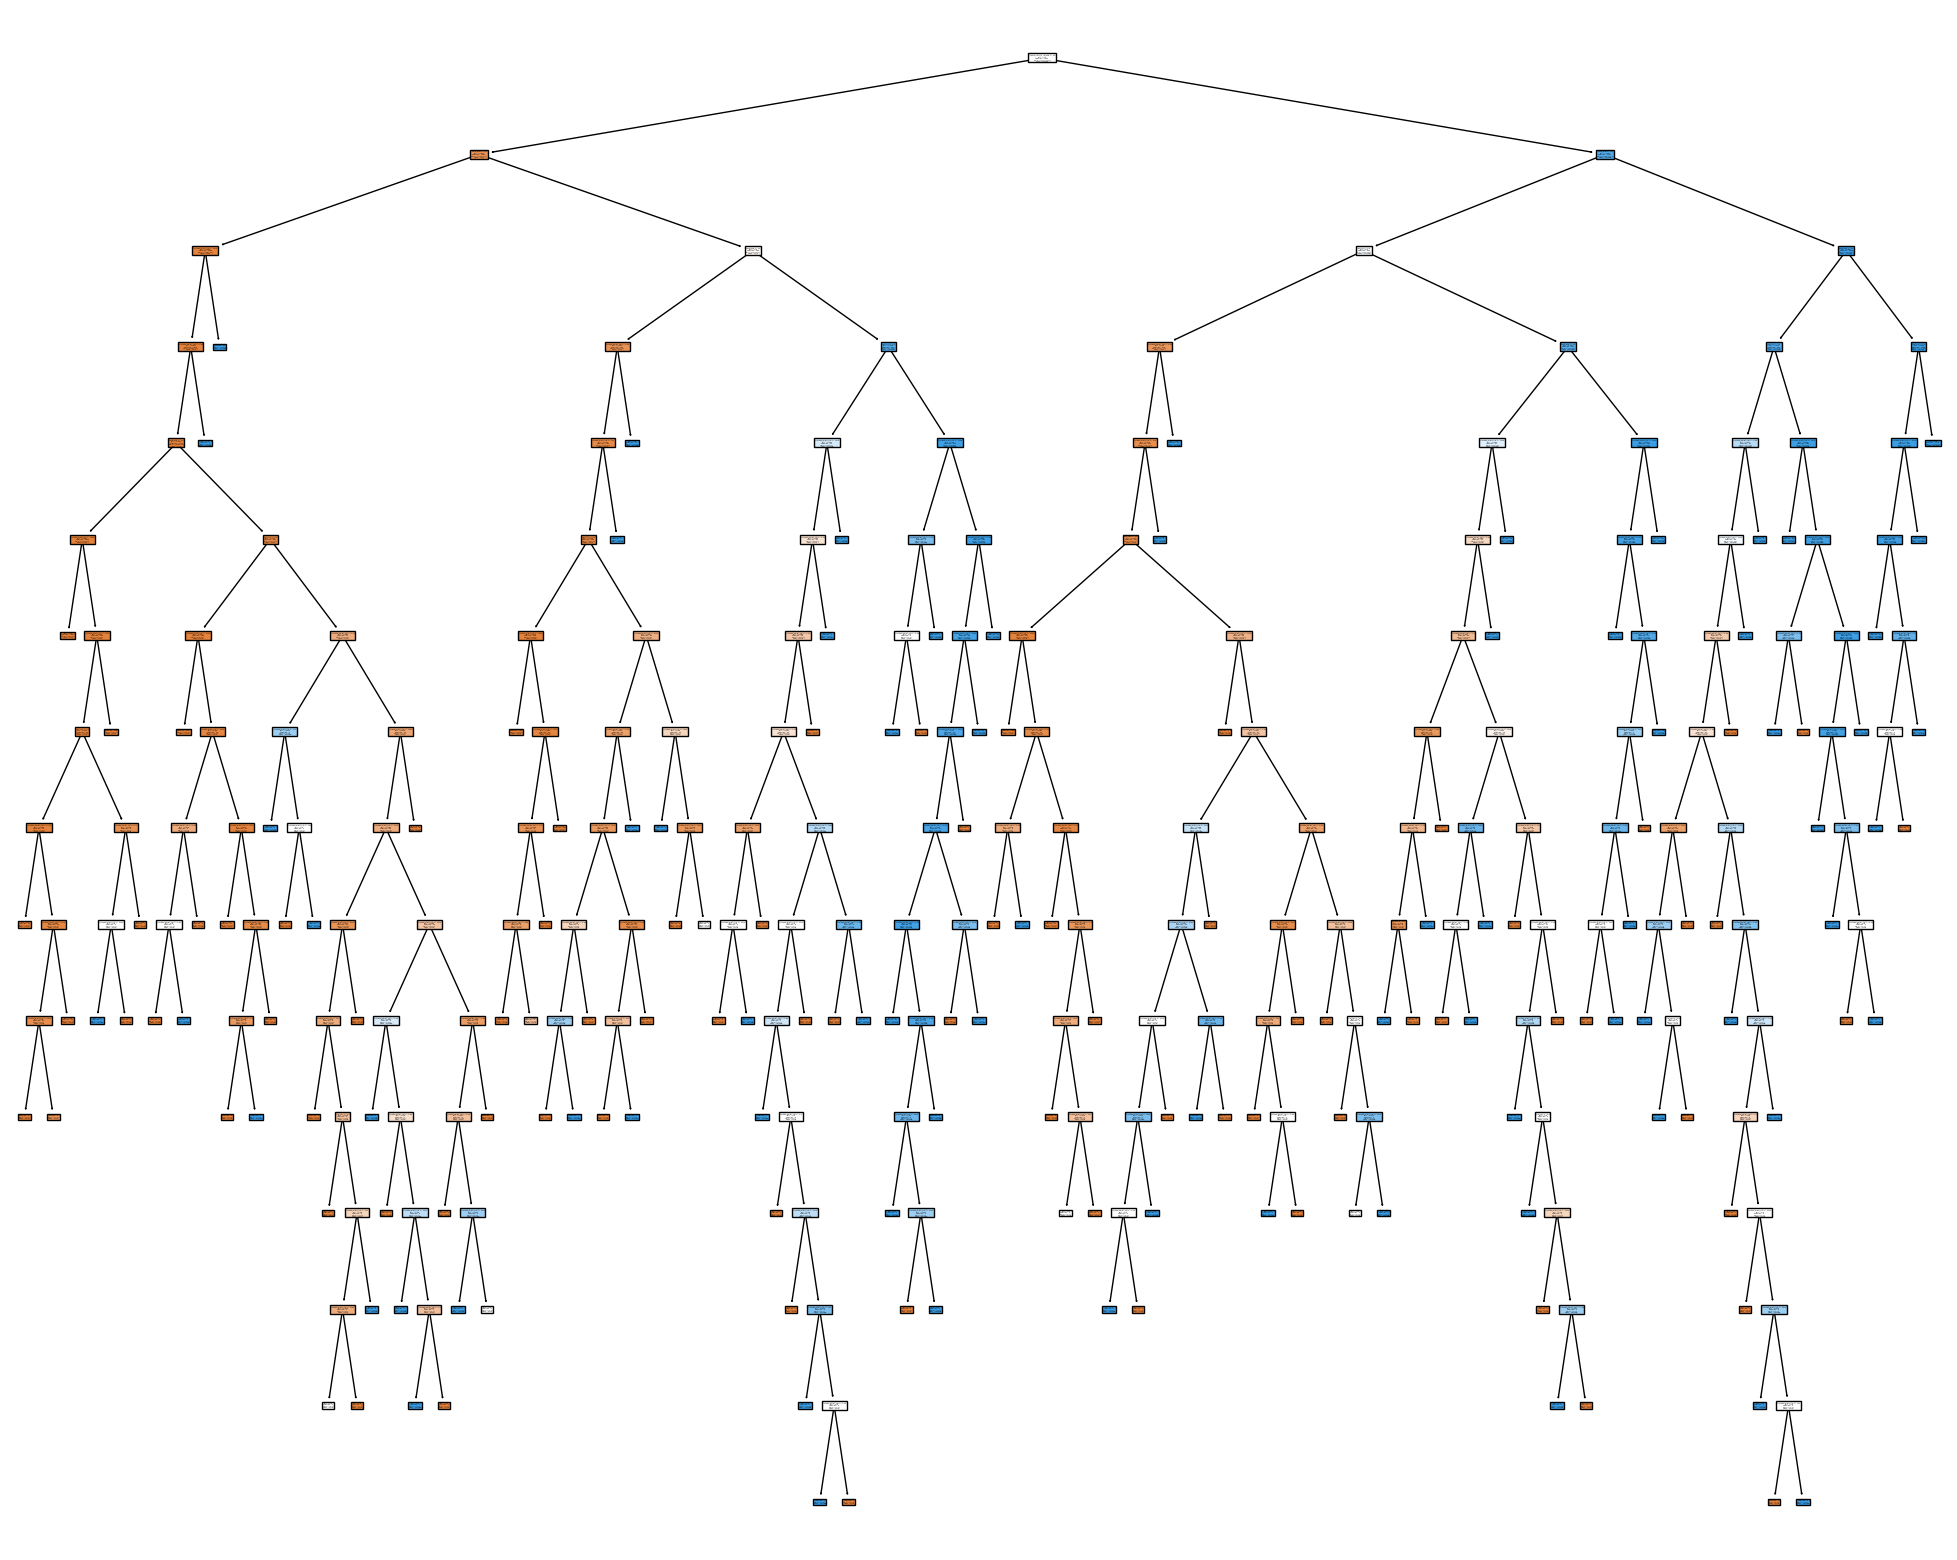

In [107]:
from sklearn import datasets
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Membangun model tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Membuat visualisasi dalam bentuk gambar
features = list(X_train.columns)
labels = [str(label) for label in list(y_train.unique())]

fig = plt.figure(figsize=(25,20))
_ = plot_tree(tree_model, feature_names=features, class_names=labels, filled=True)

In [108]:
from sklearn import tree

# Melakukan visualisasi pada decision tree yang sudah dibangun sebelumnya
print(tree.export_text(tree_model, feature_names=pd.Series(X.columns).array))

|--- distance_nose_to_lip_long <= 0.50
|   |--- nose_wide <= 0.50
|   |   |--- forehead_width_cm <= 14.35
|   |   |   |--- forehead_height_cm <= 6.65
|   |   |   |   |--- nose_long <= 0.50
|   |   |   |   |   |--- forehead_width_cm <= 13.55
|   |   |   |   |   |   |--- class: Female
|   |   |   |   |   |--- forehead_width_cm >  13.55
|   |   |   |   |   |   |--- forehead_width_cm <= 13.75
|   |   |   |   |   |   |   |--- lips_thin <= 0.50
|   |   |   |   |   |   |   |   |--- forehead_height_cm <= 6.05
|   |   |   |   |   |   |   |   |   |--- class: Female
|   |   |   |   |   |   |   |   |--- forehead_height_cm >  6.05
|   |   |   |   |   |   |   |   |   |--- forehead_height_cm <= 6.15
|   |   |   |   |   |   |   |   |   |   |--- forehead_width_cm <= 13.65
|   |   |   |   |   |   |   |   |   |   |   |--- class: Female
|   |   |   |   |   |   |   |   |   |   |--- forehead_width_cm >  13.65
|   |   |   |   |   |   |   |   |   |   |   |--- class: Female
|   |   |   |   |   |   |   |   |   

Dapat dilihat bahwa *decision tree* yang dihasilkan terlihat sangat kompleks. Hal tersebut beresiko untuk terjadi *overfitting* dan juga sulit untuk divisualisasikan. Oleh karena itu, perubahan *hyperparameter* pada model decision tree bisa membuat model yang dihasilkan tidak terlalu kompleks. Contohnya sebagai berikut:

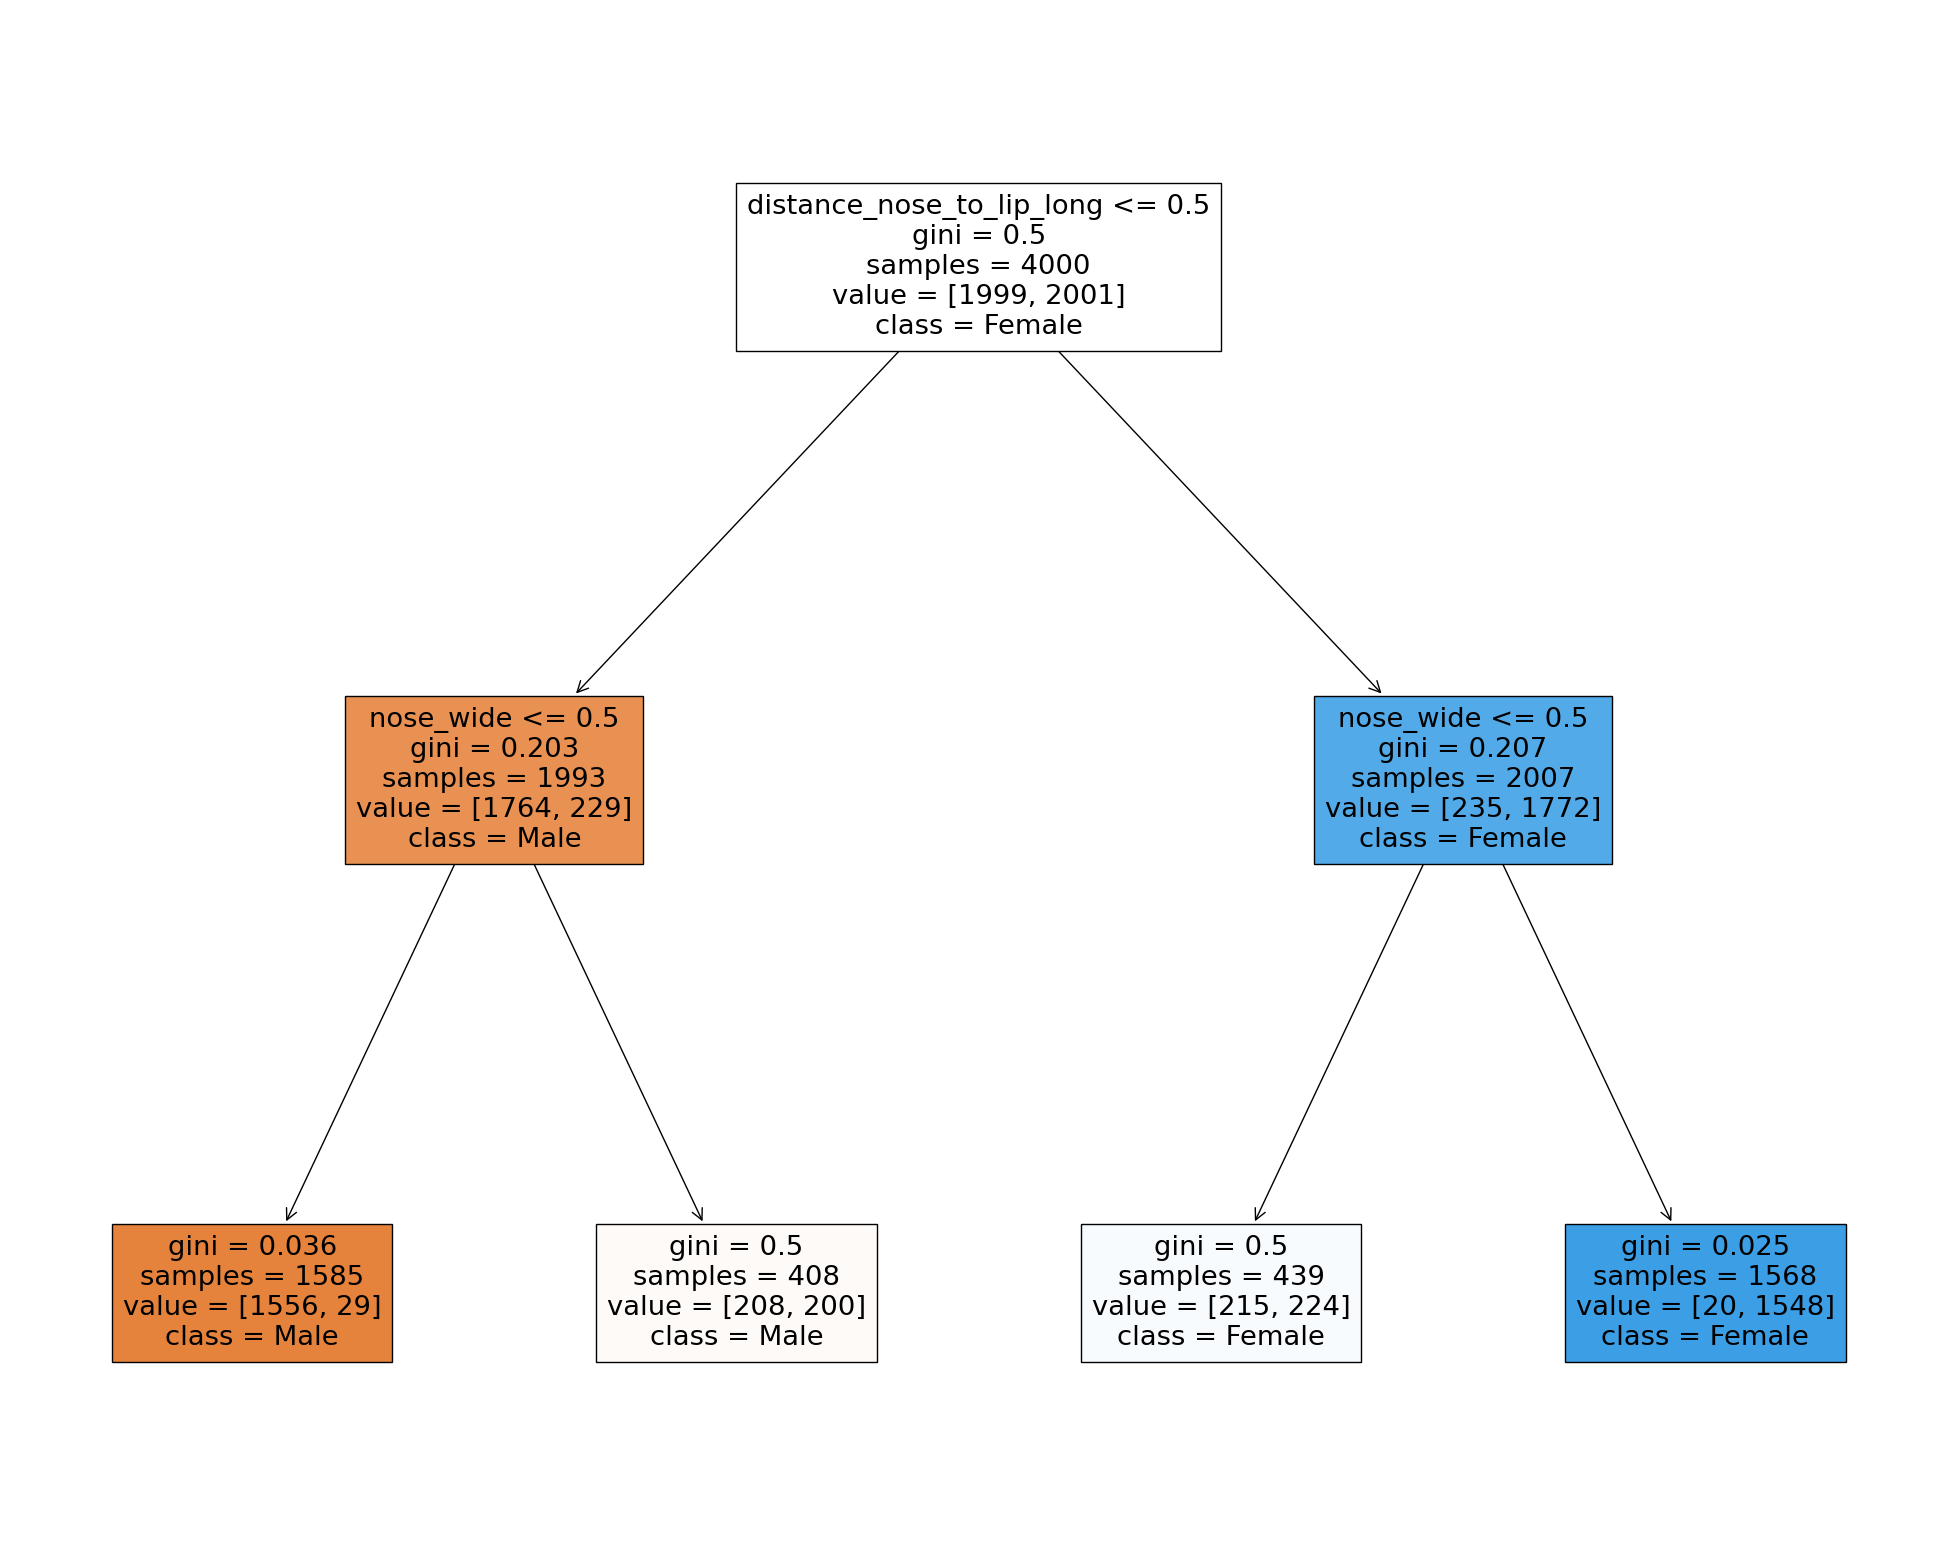

In [109]:
# Membangun model tree
dt_md2 = DecisionTreeClassifier(max_depth=2)
dt_md2.fit(X_train, y_train)

# Membuat visualisasi dalam bentuk gambar
features = list(X_train.columns)
labels = [str(label) for label in list(y_train.unique())]

fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt_md2, feature_names=features, class_names=labels, filled=True)

In [110]:
# Melakukan visualisasi pada decision tree yang sudah dibangun sebelumnya
print(tree.export_text(dt_md2, feature_names=pd.Series(X.columns).array))

|--- distance_nose_to_lip_long <= 0.50
|   |--- nose_wide <= 0.50
|   |   |--- class: Female
|   |--- nose_wide >  0.50
|   |   |--- class: Female
|--- distance_nose_to_lip_long >  0.50
|   |--- nose_wide <= 0.50
|   |   |--- class: Male
|   |--- nose_wide >  0.50
|   |   |--- class: Male



Pada model decision tree di atas, dilakukan pembatasan pada kedalaman maksimal dengan mengatur nilai dari `max_depth`. Perubahan *hyperparameter* ini dilakukan untuk mendapatkan model dengan jenis yang sama namun atribut yang berbeda. Untuk pemilihan *hyperparameter* apa yang tepat, biasanya memperhatikan persebaran data pada dataset yang diberikan dan dibantu oleh pengalaman dalam melakukan serangkaian kegiatan data science.  

Pemilihan dari *hyperparameter* biasanya disebut sebagai *Hyperparameter Tuning* dan ada metode yang dinamakan Grid Search Cross Validation yang bisa digunakan untuk memilih *hyperparameter* terbaik dari beberapa *hyperparameter* yang disediakan berdasarkan kriteria tertentu. Jika kalian tertarik terkait dengan penerapan Grid Search Cross Validation, silakan mencari dan mempraktikannya sebagai latihan mandiri.

Informasi lebih lanjut dapat diakses pada dokumentasi berikut: [link text](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

### Ensemble Learning

*Ensemble Learning* adalah proses di mana kita menggunakan banyak model untuk mendapatkan hasil yang lebih baik dibandingkan dengan menggunakan satu model saja. Salah satu jenis *ensemble learning* adalah *bagging* (*bootstrap aggregating*). 

Pada metode *bagging*, setiap model akan dilatih menggunakan subhimpunan dari data *training* (tidak keseluruhan data latih digunakan dalam setiap proses *training*). Pada subhimpunan data yang satu dengan yang lainnya bisa mengandung data yang sama (tidak harus beda semua), hal inilah yang disebut dengan *bootstrap sampling*. Nantinya, setiap model yang telah dilatih akan melakukan proses prediksi terhadap data yang baru. Hasil prediksi akhir didapatkan melalui sistem *majority voting* di mana hasil akhirnya akan menggunakan hasil prediksi yang paling banyak muncul pada model-model yang telah dibuat.

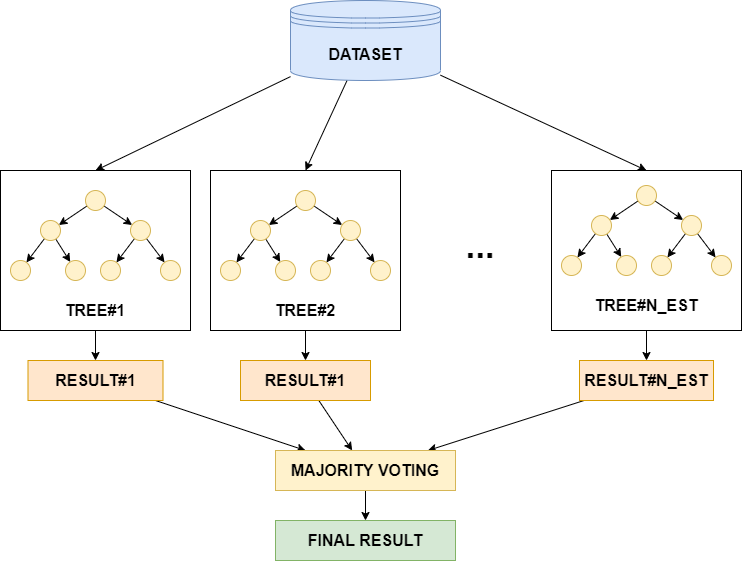

Sumber: Olahan Pribadi

### *Random Forest*

*Random Forest* merupakan salah satu variasi dari konsep *bagging* pada *ensemble learning* yang menggunakan Decision Tree sebagai basis modelnya. Setiap model yang dibangun berupa Decision Tree dan nantinya model tersebut dilatih dan digunakan untuk melakukan prediksi. Output dari Random Forest itu sendiri merupakan hasil prediksi yang paling banyak muncul di antara model-model Decision Tree.

In [111]:
from sklearn.ensemble import RandomForestClassifier

# Melakukan training pada model random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Memprediksi data testing
predicted = rf.predict(X_test)

# Memanggil fungsi evaluate_classifier_performance
evaluate_classifier_performance(predicted,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

      Female       0.96      0.96      0.96       502
        Male       0.96      0.96      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



Confusion Matrix



prediction,Female,Male
actual,,
Female,483,19
Male,22,477




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.9590394874072448
F1 Micro Average: 0.9590409590409591
Precision Macro Average: 0.9590645959757266
Precision Micro Average: 0.9590409590409591
Recall Macro Average: 0.9590316090348027
Recall Micro Average: 0.9590409590409591



Terlihat bahwa terdapat perubahan pada nilai akurasinya walaupun tidak terlalu signifikan, dimana pada decision tree tanpa hyperparameter, nilai akurasinya adalah 0,95 dan pada random forest tanpa hyperparameter, nilai akurasinya adalah 0,96.

Diharapkan untuk mempelajari kelebihan dan kekurangan dari setiap jenis model yang dipelajari agar kita bisa mengetahui pada dataset seperti apa suatu jenis model cocok untuk digunakan. Agar model yang dihasilkan lebih baik, kita juga harus bisa memilih *hyperparameter* yang sesuai dengan permasalahan yang ingin diselesaikan.

Adapun beberapa *hyperparameter* yang dapat kita eksplorasi pada Random Forest:
* `n_estimators`: Berapa banyak decision tree yang akan membentuk random forest
* `max_depth`: Kedalaman maksimal dari masing-masing Decision Tree
* `min_samples_split`: Jumlah sample minimal yang diperlukan untuk memecah suatu internal node pada setiap Decision Tree

Informasi lebih lanjut dapat diakses pada dokumentasi berikut: [dokumentasi Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

## Hyperparameter Tuning

Hyperparameter tuning dapat digunakan untuk mendapatkan hasil evaluasi yang terbaik untuk suatu model. Misalkan kita ingin mendapatkan parameter terbaik untuk model Decision Tree, maka kita harus mencoba berbagai kombinasi hyperparameter yang diinginkan. Untuk mempermudah mencari hyperparameter yang tepat, kita dapat menggunakan modul GridSearchCV dari library Scikit-Learn. Informasi lebih lanjut mengenai GridSearchCV dapat diakses [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Beberapa parameter yang sering digunakan, yaitu:
- `estimator`: model yang akan digunakan
- `param_grid`: kombinasi berbagai hyperparameter yang akan digunakan.
- `cv`: jumlah cross-validation yang ingin digunakan

In [112]:
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion': ['gini', 'entropy'],
               'min_samples_split': [10, 20, 50],
               'max_depth' : [5, 10, 12, None]}

dt = DecisionTreeClassifier()

clf = GridSearchCV(estimator= dt, 
                   param_grid=param_grid, cv= 5)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 12, None],
                         'min_samples_split': [10, 20, 50]})

In [113]:
clf.best_params_

{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10}

In [114]:
# Melakukan training pada model decision tree
# Decision tree yang dibangun memiliki hyperparameter yang diatur dengan best params
dt_bp = DecisionTreeClassifier(**clf.best_params_)
dt_bp.fit(X_train, y_train)

# Memprediksi data testing
prediction_bp = dt_bp.predict(X_test)

# Memanggil fungsi evaluate_classifier_performance
evaluate_classifier_performance(prediction_bp,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

      Female       0.96      0.96      0.96       502
        Male       0.96      0.96      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



Confusion Matrix



prediction,Female,Male
actual,,
Female,482,20
Male,20,479




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.9600396011145798
F1 Micro Average: 0.9600399600399601
Precision Macro Average: 0.9600396011145798
Precision Micro Average: 0.9600399600399601
Recall Macro Average: 0.9600396011145798
Recall Micro Average: 0.9600399600399601



Sekarang kita mendapatkan kombinasi terbaik dari berbagai kombinasi hyperparameter yang telah kita coba.

# Latihan Soal

## SOAL 1

Implementasikan sebuah model Decision Tree untuk melakukan suatu task *klasifikasi* yang memprediksi `gender` seseorang.

### SOAL 1a
[5] Bangun model Decision Tree dengan memberikan nilai pada *hyperparameter* 
- `max_depth = 5`

In [115]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

### SOAL 1b
[5]  Visualisasikan model decision tree yang didapat pada soal 1a menggunakan plot_tree dan juga tree.export_text!

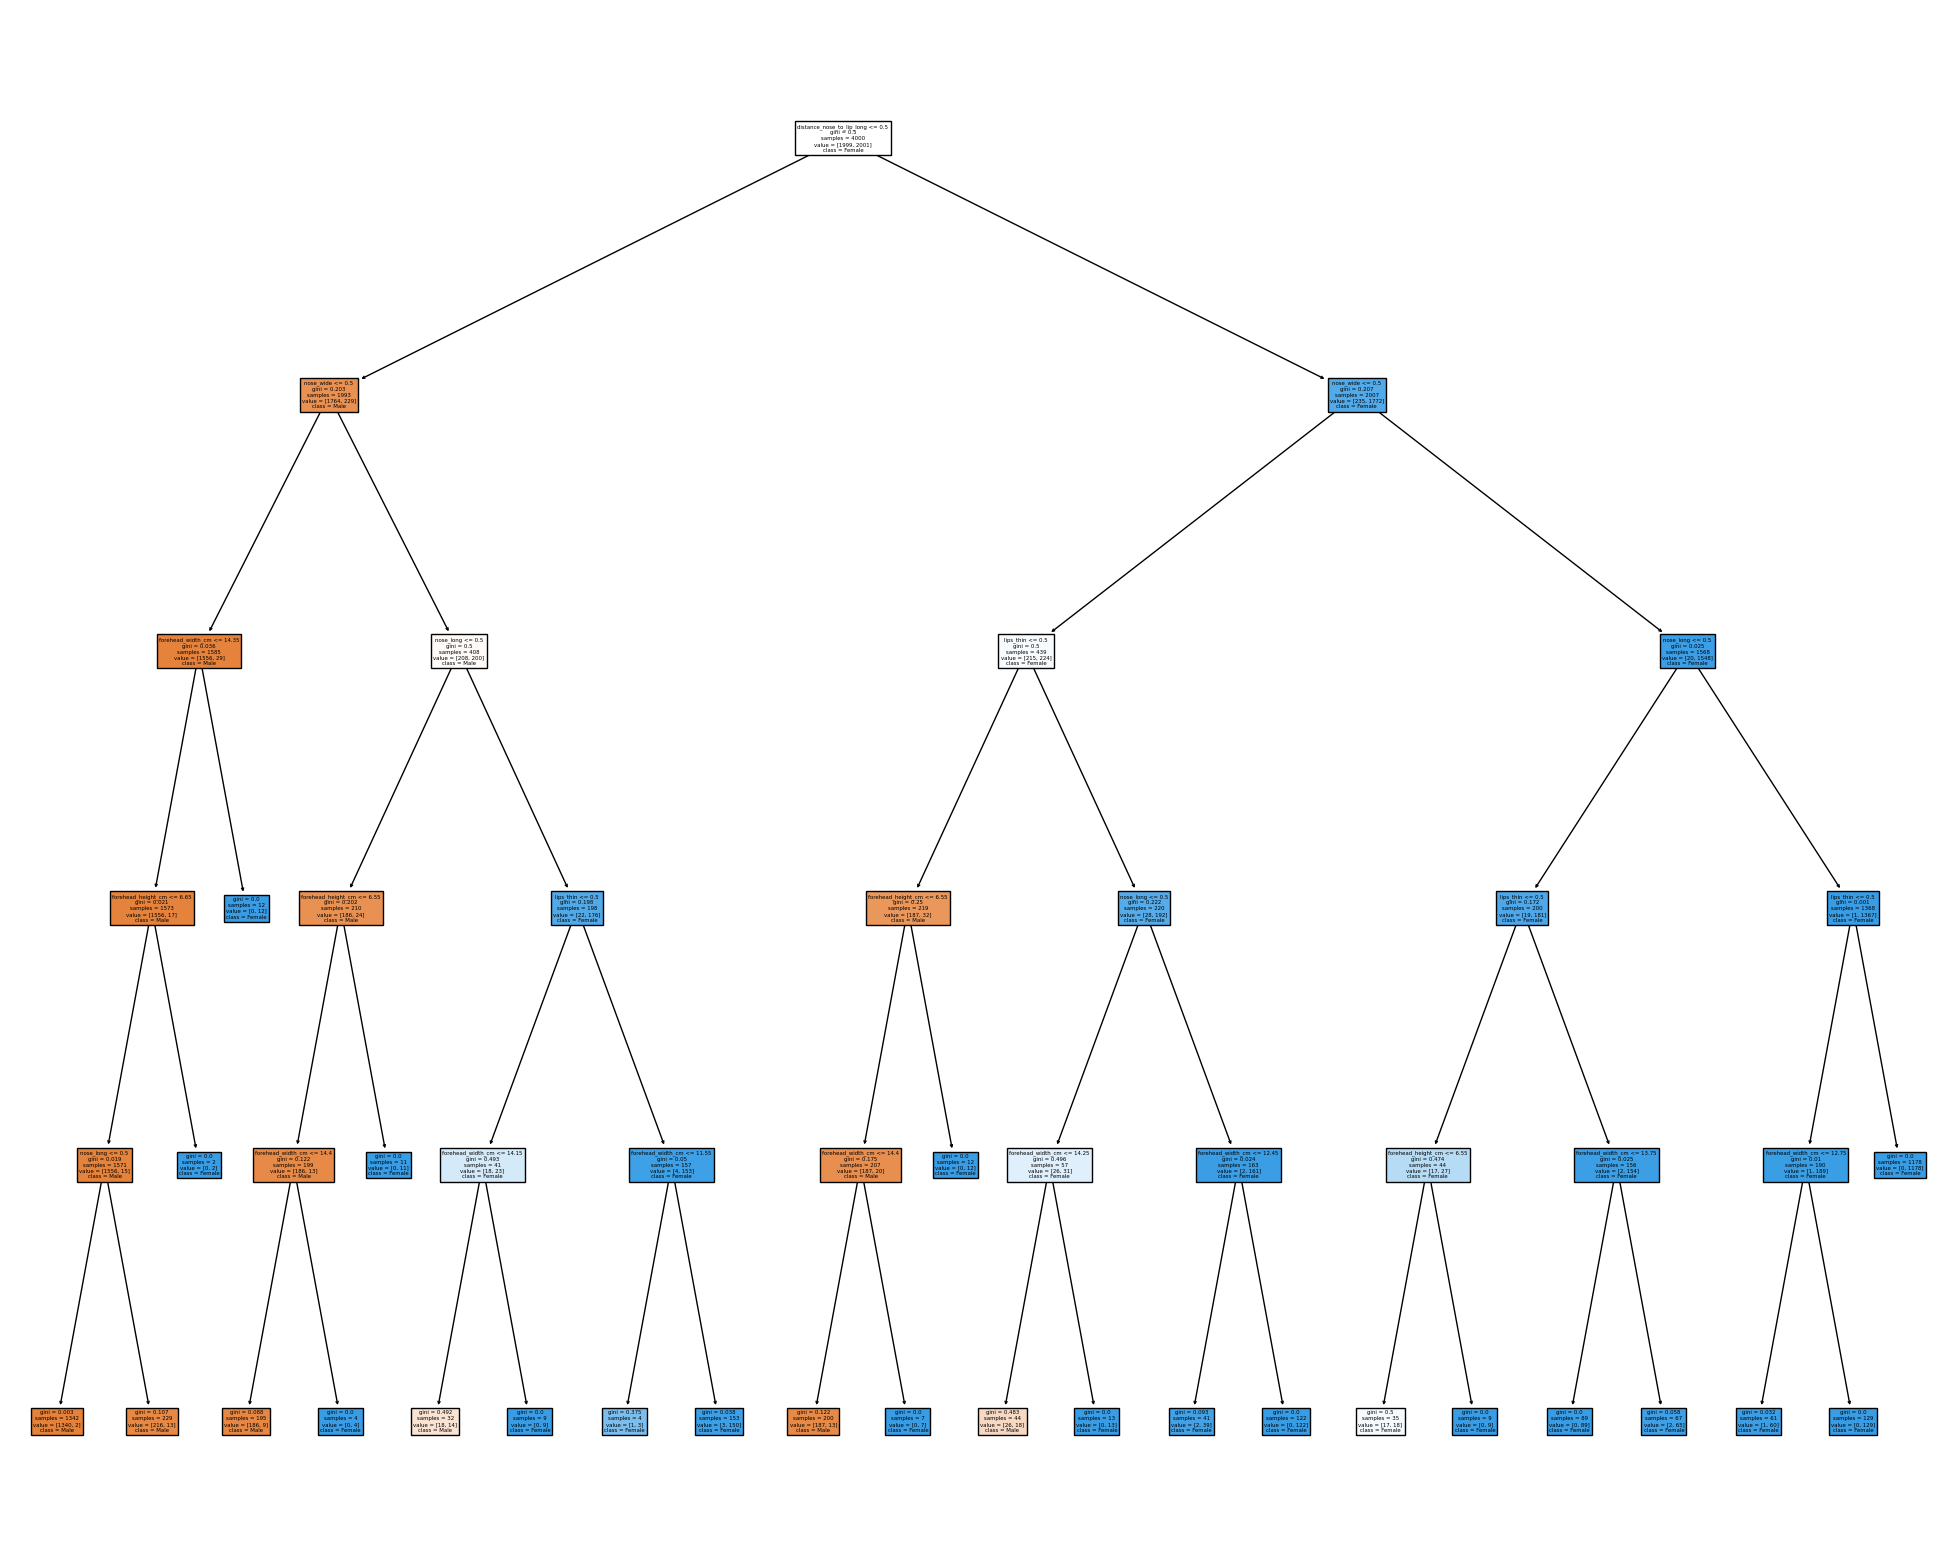

In [116]:

# Membuat visualisasi dalam bentuk gambar
features = list(X_train.columns)
labels = [str(label) for label in list(y_train.unique())]

fig = plt.figure(figsize=(25,20))
_ = plot_tree(model, feature_names=features, class_names=labels, filled=True)

In [117]:
# Melakukan visualisasi pada decision tree yang sudah dibangun sebelumnya
print(tree.export_text(model, feature_names=pd.Series(X.columns).array))

|--- distance_nose_to_lip_long <= 0.50
|   |--- nose_wide <= 0.50
|   |   |--- forehead_width_cm <= 14.35
|   |   |   |--- forehead_height_cm <= 6.65
|   |   |   |   |--- nose_long <= 0.50
|   |   |   |   |   |--- class: Female
|   |   |   |   |--- nose_long >  0.50
|   |   |   |   |   |--- class: Female
|   |   |   |--- forehead_height_cm >  6.65
|   |   |   |   |--- class: Male
|   |   |--- forehead_width_cm >  14.35
|   |   |   |--- class: Male
|   |--- nose_wide >  0.50
|   |   |--- nose_long <= 0.50
|   |   |   |--- forehead_height_cm <= 6.55
|   |   |   |   |--- forehead_width_cm <= 14.40
|   |   |   |   |   |--- class: Female
|   |   |   |   |--- forehead_width_cm >  14.40
|   |   |   |   |   |--- class: Male
|   |   |   |--- forehead_height_cm >  6.55
|   |   |   |   |--- class: Male
|   |   |--- nose_long >  0.50
|   |   |   |--- lips_thin <= 0.50
|   |   |   |   |--- forehead_width_cm <= 14.15
|   |   |   |   |   |--- class: Female
|   |   |   |   |--- forehead_width_cm >  14

### SOAL 1c

[5] Jika diberikan data X dengan fitur berikut:
* `distance_nose_to_lip_long = 1`	
* `nose_wide = 0`	
* `forehead_width_cm = 13.00`	
* `forehead_height_cm = 6.65`	
* `nose_long = 0`	
* `lips_thin = 1`	
* `long_hair = 1`


Berdasarkan visualisasi yang dihasilkan pada Soal 1b, apa hasil prediksi `Class` dari data X?    
**Catatan:** Tidak perlu dilakukan implementasi kode pada bagian ini

> **FEMALE**

## SOAL 2

Bangun model Decision Tree dengan memberikan nilai *hyperparameter* yang berbeda dengan Soal 1. Tujuan dari adanya soal 1 dan 2 adalah agar kita bisa melihat perbedaan hasil yang didapat pada kedua model yang dibangun tersebut. Berikut merupakan pengaturan *hyperparameter* untuk soal nomor ini:
- `max_depth = 2` 
- `min_samples_split = 100`

### SOAL 2a
[5]  Bangun model decision tree sesuai ketentuan.

In [118]:
model2 = DecisionTreeClassifier(max_depth=2, min_samples_split=100)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=100)

### SOAL 2b
[5]  Visualisasikan model decision tree yang didapat pada soal 2a menggunakan plot_tree dan juga tree.export_text!

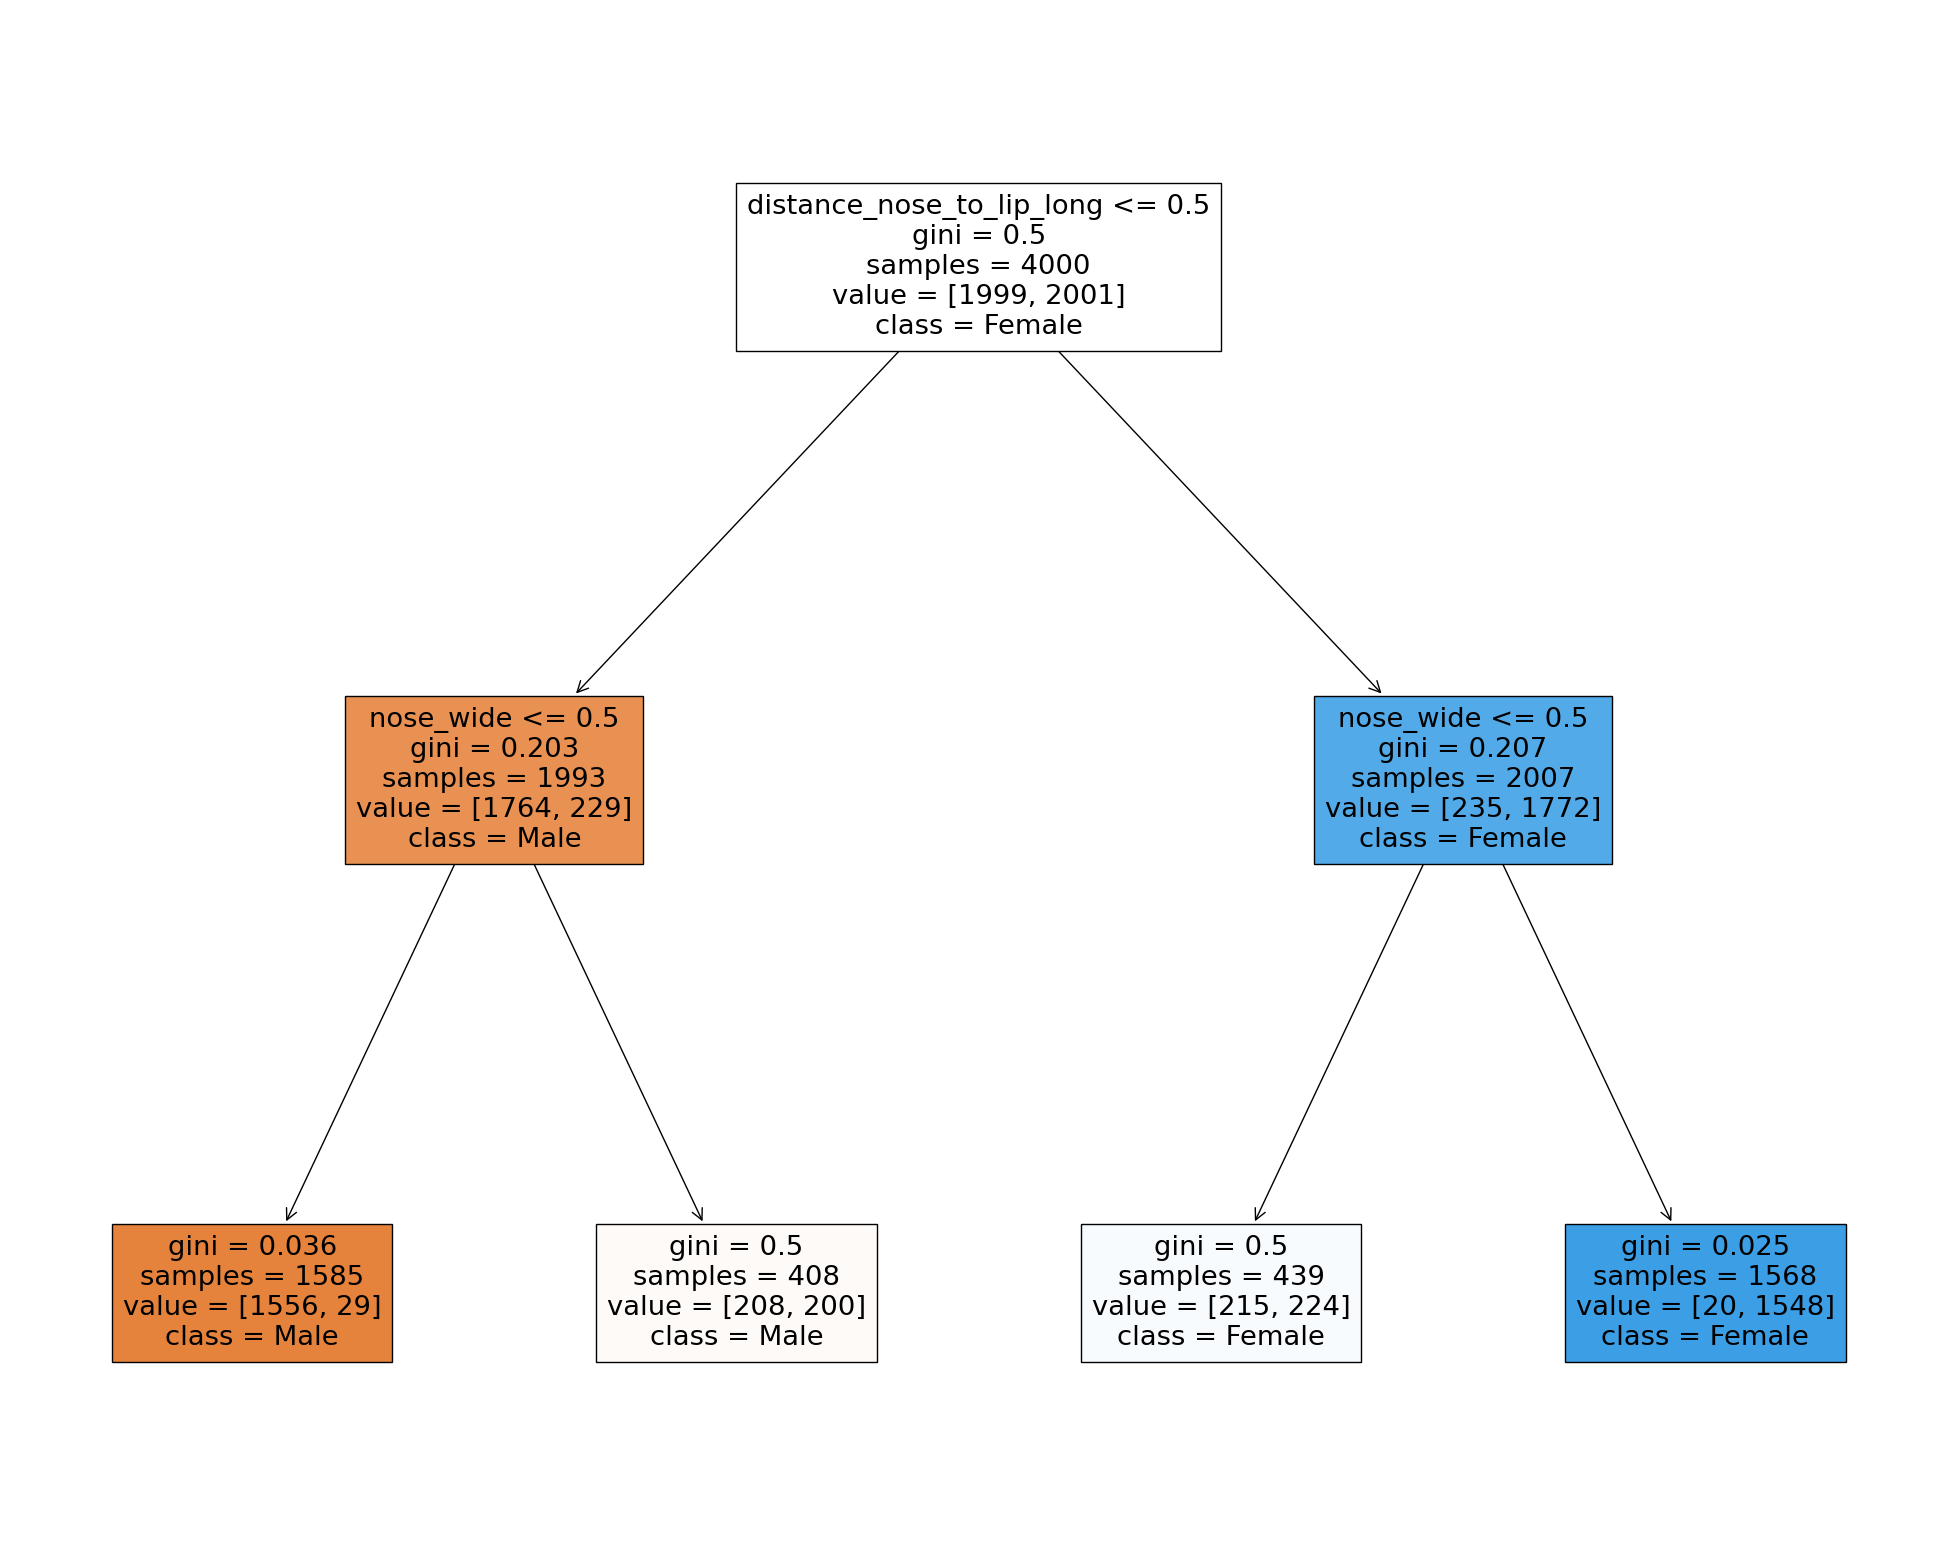

In [119]:

# Membuat visualisasi dalam bentuk gambar
features = list(X_train.columns)
labels = [str(label) for label in list(y_train.unique())]

fig = plt.figure(figsize=(25,20))
_ = plot_tree(model2, feature_names=features, class_names=labels, filled=True)

In [120]:
# Melakukan visualisasi pada decision tree yang sudah dibangun sebelumnya
print(tree.export_text(model2, feature_names=pd.Series(X.columns).array))

|--- distance_nose_to_lip_long <= 0.50
|   |--- nose_wide <= 0.50
|   |   |--- class: Female
|   |--- nose_wide >  0.50
|   |   |--- class: Female
|--- distance_nose_to_lip_long >  0.50
|   |--- nose_wide <= 0.50
|   |   |--- class: Male
|   |--- nose_wide >  0.50
|   |   |--- class: Male



### SOAL 2c

[5]Jika diberikan data X dengan fitur berikut:
* `distance_nose_to_lip_long = 1`	
* `nose_wide = 0`	
* `forehead_width_cm = 13.00`	
* `forehead_height_cm = 6.65`	
* `nose_long = 0`	
* `lips_thin = 1`	
* `long_hair = 1`


Berdasarkan visualisasi yang dihasilkan pada Soal 2b, apa hasil prediksi `Class` dari data X?    
**Catatan:** Tidak perlu dilakukan implementasi kode pada bagian ini

> **MALE**

## SOAL 3

[5] Bangun model Random Forest dengan memberikan nilai *hyperparameter* sebagai berikut:
- `max_depth = 5` 

In [121]:
model3 = RandomForestClassifier(max_depth=5)
model3.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

## SOAL 4

[15]
* Lakukan prediksi terhadap data *testing* (`X_test`) menggunakan model yang sudah dibangun pada soal 1, 2, dan 3.
* Lakukan evaluasi pada hasil prediksi yang didapat terhadap label aktual (`y_test`). Metrik evaluasi yang ditampilkan mencakup nilai akurasi, F1-score, precision, dan recall  dari hasil prediksi yang didapat.  
* Bandingkanlah hasil evaluasi yang didapat dan tuliskan analisis singkat terkait dengan perbandingan tersebut (minimal 4 poin).

In [122]:
# Membuat fungsi untuk mengevaluasi performa model
def evaluate(prediction, y_test):
    print('Accuracy score:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [123]:
# MODEL NOMOR 1
prediction1 = model.predict(X_test)
evaluate(prediction1, y_test)

Accuracy score: 0.9590409590409591
F1 Macro Average: 0.9590246016128179
F1 Micro Average: 0.9590409590409591
Precision Macro Average: 0.9596135242526723
Precision Micro Average: 0.9590409590409591
Recall Macro Average: 0.9589896925324753
Recall Micro Average: 0.9590409590409591



In [124]:
# MODEL NOMOR 2
prediction2 = model2.predict(X_test)
evaluate(prediction2, y_test)

Accuracy score: 0.8511488511488512
F1 Macro Average: 0.8511197288893546
F1 Micro Average: 0.8511488511488512
Precision Macro Average: 0.8513305691368677
Precision Micro Average: 0.8511488511488512
Recall Macro Average: 0.8511145797571238
Recall Micro Average: 0.8511488511488512



In [125]:
# MODEL NOMOR 3
prediction3 = model3.predict(X_test)
evaluate(prediction3, y_test)

Accuracy score: 0.967032967032967
F1 Macro Average: 0.9670282285795277
F1 Micro Average: 0.967032967032967
Precision Macro Average: 0.9672071568353369
Precision Micro Average: 0.967032967032967
Recall Macro Average: 0.9670057245966035
Recall Micro Average: 0.967032967032967



> Dapat dilihat bahwa model pada nomor 3 overall memberikan hasil yang lebih baik dibandingkan dengan model pada nomor 1 dan 2. Hal ini ditandai dengan nilai akurasi pada setiap metrics yang lebih tinggi dibandingkan dengan model pada nomor 1 dan 2.
> 
> **ANALISIS**
> 1. Nilai akurasi pada model nomor 3 lebih tinggi dibandingkan dengan model nomor 1 dan 2. Hal ini dikarenakan model nomor 3 menggunakan model Random Forest yang merupakan model yang lebih kompleks (gabungan dari beberapa decision tree) dibandingkan dengan model nomor 1 dan 2 yang menggunakan Decision Tree biasa. Random Forest memiliki kemampuan untuk membangun banyak model Decision Tree yang kemudian di-*ensemble* menjadi satu model yang lebih baik.
> 2. Akurasi model nomor 1 menghasilkan lebih baik dibandingkan akurasi model nomor 2 dikarenakan model pada nomor 2 max_depth yang digunakan adalah 2. Hal ini berarti model pada nomor 2 memiliki kedalaman yang lebih rendah dibandingkan dengan model pada nomor 1. Kedalaman yang lebih rendah dapat meningkatkan kemungkinan model menjadi underfitting.
> 3. Kemungkinan model pada nomor 2 menjadi underfitting dikarenakan nilai max_depth yang sangat kecil, yaitu 2.
> 4. Dari ketiga model tersebut, menurut saya model yang merupakan best fit adalah model pada nomor 3 karena memiliki nilai akurasi yang paling tinggi.

## SOAL 5

Gunakan GridSearchCV untuk mencari hyperparameter yang baik untuk model Random Forest. 

### Soal 5a
[9] Proses Grid search diwajibkan melakukan tuning pada hyperparameter berikut: **criterion, max_depth, min_samples_split**.
*Namun, kalian masih boleh mengambil hyperparameter lain.*

In [126]:
params = {'criterion': ['gini', 'entropy', 'log_loss'],
            'min_samples_split': [10, 20, 50, 100],
            'max_depth' : [None, 5, 10, 12, 15],
            'splitter': ['best', 'random']}

dtc = DecisionTreeClassifier()
clf = GridSearchCV(estimator=dtc, param_grid=params, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 12, 15],
                         'min_samples_split': [10, 20, 50, 100],
                         'splitter': ['best', 'random']})

### Soal 5b
[2] Tampilkan hyperparameter terbaik yang kalian dapatkan dari proses Grid Search

In [127]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_split': 10,
 'splitter': 'best'}

### Soal 5c

[4] Buatlah model Random Forest berdasarkan hyperparameter yang kalian dapatkan dari **soal 5b**

In [128]:
best_dt = DecisionTreeClassifier(**clf.best_params_)
best_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, min_samples_split=10)

### Soal 5d
[4]

Lakukan prediksi dengan X_test dan **munculkan** hasil evaluasi terhadap label y_test

In [129]:
new_prediction = best_dt.predict(X_test)
evaluate(new_prediction, y_test)

Accuracy score: 0.9590409590409591
F1 Macro Average: 0.9590407955313239
F1 Micro Average: 0.9590409590409591
Precision Macro Average: 0.9590399201596806
Precision Micro Average: 0.9590409590409591
Recall Macro Average: 0.9590435851783248
Recall Micro Average: 0.9590409590409591



## SOAL 6

[4] Untuk setiap nomor, letakkan link ke sumber di bawah masing-masing jawaban! 
1. [4] Untuk menyelesaikan masalah seperti apa kita harus membuat model classification tree? Bagaimana dengan regression tree? Berikan masing-masing 2 contoh masalah yang dapat diselesaikan oleh classification tree dan regression tree! 
2. [2] Mengapa waktu eksekusi random forest untuk klasifikasi jauh lebih lama dibandingkan classification tree?
3. [3] Sebutkan dan jelaskan 3 hyperparameter pada decision tree yang dapat diatur SELAIN criterion, max_depth, dan min_sample_split!
4. [3] Mengapa min_samples_split dapat digunakan untuk mengatasi overfitting pada decision tree? Apa akibatnya jika hyperparameter tersebut diatur terlalu kecil atau terlalu besar?

> 1. Classification tree digunakan untuk memprediksi kelas dari suatu data (diskret), sedangkan regression tree digunakan untuk memprediksi nilai dari suatu data (continous). Contoh masalah yang dapat diselesaikan oleh classification tree adalah memprediksi jenis kelamin seseorang berdasarkan tinggi, berat, dan warna rambutnya. Sedangkan contoh masalah yang dapat diselesaikan oleh regression tree adalah memprediksi harga rumah berdasarkan luas tanah, jumlah kamar, dan lokasi rumah tersebut.
> 
> https://www.quora.com/What-is-the-difference-between-a-regression-tree-and-a-decision-tree
> 
> 2. Karena random forest terdiri atas banyak decision tree yang digabungkan menjadi satu, sehingga membutuhkan waktu yang lebih lama untuk melakukan training maupun prediksi.
> 
> https://www.ibm.com/id-en/topics/random-forest#:~:text=Random%20forest%20is%20a%20commonly,both%20classification%20and%20regression%20problems.
> 
> 3. hyperparameter
>    - min_samples_leaf: jumlah minimal sample yang dibutuhkan pada leaf node
>    - max_features: jumlah maksimal fitur yang akan dipertimbangkan pada saat melakukan split
>    - random_state: mengontrol kerandoman dari estimator (model)
> 
> https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
> 
> 4. Min_samples_split dapat digunakan untuk mengatasi overfitting pada decision tree karena dapat mengatur jumlah minimum data yang harus ada pada suatu node agar dapat dilakukan split. Jika hyperparameter tersebut diatur terlalu kecil, maka akan terjadi overfitting karena model akan terlalu kompleks dan terlalu detail (terlalu fit dengan training data akan menyebabkan model kesusahan untuk menghasilkan prediksi yang bagus pada unseen data). Jika hyperparameter tersebut diatur terlalu besar, maka akan terjadi underfitting karena model akan terlalu sederhana (model tidak dapat mengidentifikasi pola yang ada pada data).
> 
> https://stackoverflow.com/questions/46480457/difference-between-min-samples-split-and-min-samples-leaf-in-sklearn-decisiontre

## Soal 7
Analisis kebutuhan preprocessing berupa normalisasi data ketika membuat model CART

### 7a
[2] Sebelum membagi data menjadi data train dan test, cobalah untuk melakukan standard scaling pada X dan menyimpan hasilnya pada variabel scaled_X! 

In [130]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

### 7b
[2] Bagi data scaled_X dan y ke dalam data training (scaled_X_train, y_train) dan testing (scaled_x_test, y_test) dengan rasio data training dan testing 8:2!

In [131]:
from sklearn.model_selection import train_test_split

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

### 7c
[2] Bangun model Decision Tree dengan memberikan nilai pada *hyperparameter* yang sama seperti pada soal no. 1, yaitu
- `max_depth = 5`

In [132]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5)

### 7d
[4] Lakukan prediksi pada decision tree no 1 (tanpa normalisasi) menggunakan X_test dan pada decision tree di soal 7c (dengan normalisasi) menggunakan scaled_X_test. Kemudian tampilkan metrics performa kedua decision tree.

In [133]:
prediction1 = model.predict(X_test)
print('===== evaluation for model 1 =====')
evaluate(prediction1, y_test)
print()

prediciton2 = dt.predict(X_test_scaled)
print('===== evaluation for model 2 =====')
evaluate(prediciton2, y_test)

===== evaluation for model 1 =====
Accuracy score: 0.9590409590409591
F1 Macro Average: 0.9590246016128179
F1 Micro Average: 0.9590409590409591
Precision Macro Average: 0.9596135242526723
Precision Micro Average: 0.9590409590409591
Recall Macro Average: 0.9589896925324753
Recall Micro Average: 0.9590409590409591


===== evaluation for model 2 =====
Accuracy score: 0.9590409590409591
F1 Macro Average: 0.9590246016128179
F1 Micro Average: 0.9590409590409591
Precision Macro Average: 0.9596135242526723
Precision Micro Average: 0.9590409590409591
Recall Macro Average: 0.9589896925324753
Recall Micro Average: 0.9590409590409591



### 7e
[4] Apa kesimpulan yang bisa Kamu dapatkan dari membandingkan metriks performa decision tree pada no. 1 dengan decision tree pada no. 7c? Carilah sumber di internet untuk mendukung hasil percobaanmu!

> Nilai akurasi yang dihasilkan prediksi pada decision tree nomor 1 (tanpa normalisasi) dan pada decision tree nomor 7 (dengan normalisasi) adalah sama. Hal ini disebabkan oleh Decision tree tidak sensitif terhadap scaling, sehingga tidak perlu dilakukan scaling pada dataset yang digunakan.
>
> https://www.quora.com/Decision-Tree-based-models-dont-require-scaling-How-does-scaling-impact-the-predictions-of-decision-tree-based-models